# Самостоятельный проект. Принятие решений в бизнесе

**Цель проекта:** приоритизировать список подготовленных гипотез для увеличения выручки, запустить А/В тест и проанализироват результаты. 


План работы:
1. Подключить необходимые библиотеки для работы
2. Изучить общую информацию о наборах данных:
    * загрузить файлы
    * посмотреть количество данных, их тип, пропущенные значения, дубликаты, название столбцов
    * сделать вывод
3. Провести предварительную обработку данных:
    * переименовать столбцы в соответствии с правилами
    * обработать пропуски
    * изменить тип данных
    * обработать дубликаты
    * сделать вывод
4. Приоритизация гипотез с помощью фреймворка ICE и фреймворка RICE. 
5. Проанализировать A/B-тест.
    
Предоставлено 3 набора данных
Структура /datasets/hypothesis.csv:
* Hypothesis — краткое описание гипотезы;
* Reach — охват пользователей по 10-балльной шкале;
* Impact — влияние на пользователей по 10-балльной шкале;
* Confidence — уверенность в гипотезе по 10-балльной шкале;
* Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.


Структура /datasets/orders.csv:
* transactionId — идентификатор заказа;
* visitorId — идентификатор пользователя, совершившего заказ;
* date — дата, когда был совершён заказ;
* revenue — выручка заказа;
* group — группа A/B-теста, в которую попал заказ.


Структура /datasets/visitors.csv:
* date — дата;
* group — группа A/B-теста;
* visitors — количество пользователей в указанную дату в указанной группе A/B-теста

In [8]:
#подключение библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import datetime as dt
from pandas.plotting import register_matplotlib_converters
import warnings
pd.options.display.max_colwidth = 150

##  часть. Приоритизация гипотез

In [9]:
#чтение набора данных
try:
    hypothesis = pd.read_csv('dataset.csv')
except:
    hypothesis = pd.read_csv('https://dataset.csv')

In [10]:
#просмотр общей информации о наборе данных
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [11]:
hypothesis.columns = hypothesis.columns.str.lower()

In [12]:
#просмотр набора данных
hypothesis

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [13]:
#фреймворк ICE для приоритизации гипотез
hypothesis['ICE'] = round(hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts'], 2)
print(hypothesis[['hypothesis', 'ICE']].sort_values(by='ICE', ascending = False))

                                                                                                     hypothesis  \
8                                                       Запустить акцию, дающую скидку на товар в день рождения   
0            Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей   
7              Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок   
6          Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию   
2  Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа   
1                                     Запустить собственную службу доставки, что сократит срок доставки заказов   
5                      Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов   
3           Изменить структура категорий, что увеличит конверсию, т.к. пользоват

Наиболее перспективные гипотезы по ICE: 
* Запустить акцию, дающую скидку на товар в день рождения   
* Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей   
* Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок   
* Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию   
* Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа 

In [14]:
#фреймворк RICE для приоритизации гипотез
hypothesis['RICE'] = hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']
print(hypothesis[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False))

                                                                                                     hypothesis  \
7              Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок   
2  Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа   
0            Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей   
6          Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию   
8                                                       Запустить акцию, дающую скидку на товар в день рождения   
3           Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар   
1                                     Запустить собственную службу доставки, что сократит срок доставки заказов   
5                      Добавить страницу отзывов клиентов о магазине, что позвол

Наиболее перспективные гипотезы по RICE: 
* Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок   
* Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа   
* Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей   
* Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию   
* Запустить акцию, дающую скидку на товар в день рождения

Приоритет изменился по сравнению с ICE. Это вызвано тем, что показатель reach у гипотез "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок" и "Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа" высокий: максимальный у первой из перечисленных (10) и второй по значению у второй из перечисленных (8). 

У гипотезы "Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар" также высокий показатель reach (8), но у этой гипотезы также высокий показатель efforts, поэтому эта гипотеза только на 6 месте по убыванию приоритизации гипотез.

## Анализ A/B-теста

In [186]:
#чтение набора данных
try:
    orders, visitors = (
                        pd.read_csv('dataset1.csv'),
                        pd.read_csv('dataset2.csv')
                       )
except:
    orders, visitors = (
                        pd.read_csv('https://dataset1.csv'),
                        pd.read_csv('https://dataset2.csv')
                        )

In [187]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [188]:
#изменим тип данных у столбца дата
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [189]:
#приведем название столбцов к змеиному регистру
orders.rename(columns = {'transactionId':'transaction_id', 'visitorId':'visitor_id'}, inplace = True )
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  1197 non-null   int64         
 1   visitor_id      1197 non-null   int64         
 2   date            1197 non-null   datetime64[ns]
 3   revenue         1197 non-null   int64         
 4   group           1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


In [190]:
orders

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


In [191]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [192]:
#изменим тип данных у столбца дата
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [193]:
orders.duplicated().sum()

0

In [194]:
visitors.duplicated().sum()

0

В наборах данных orders и visitors нет пропущенных значений и явных дубликатов. Названия колонок в orders приведены к змеиному регистру. Был поменян тип данных у столбца с датой.

In [195]:
orders.head()

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [196]:
visitors

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


In [197]:
#создадим датафрейм с уникальными парами дата-группа
dates_groups = orders[['date', 'group']].drop_duplicates()

In [198]:
dates_groups.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62 entries, 0 to 1150
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    62 non-null     datetime64[ns]
 1   group   62 non-null     object        
dtypes: datetime64[ns](1), object(1)
memory usage: 1.5+ KB


In [199]:
#подготовим данные для создания датафрейма с кумулятивными данными
orders_aggregated = dates_groups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'transaction_id' : 'nunique', 'visitor_id' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])


In [200]:
orders_aggregated

,date,group,transaction_id,visitor_id,revenue
55,2019-08-01,A,24,20,148579
66,2019-08-01,B,21,20,101217
175,2019-08-02,A,44,38,242401
173,2019-08-02,B,45,43,266748
291,2019-08-03,A,68,62,354874
...,...,...,...,...,...
496,2019-08-29,B,596,544,5559398
730,2019-08-30,A,545,493,4022970
690,2019-08-30,B,620,567,5774631
958,2019-08-31,A,557,503,4084803


In [201]:
visitors_aggregated = dates_groups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

In [202]:
visitors_aggregated

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845
...,...,...,...
496,2019-08-29,B,17708
730,2019-08-30,A,18037
690,2019-08-30,B,18198
958,2019-08-31,A,18736


In [203]:
cumulative_data = orders_aggregated.merge(visitors_aggregated, left_on=['date', 'group'], right_on=['date', 'group'])

In [204]:
cumulative_data.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

In [205]:
cumulative_data.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


In [206]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulative_revenue_a = cumulative_data[cumulative_data['group']=='A'][['date','revenue', 'orders']]

In [207]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulative_revenue_b = cumulative_data[cumulative_data['group']=='B'][['date','revenue', 'orders']]

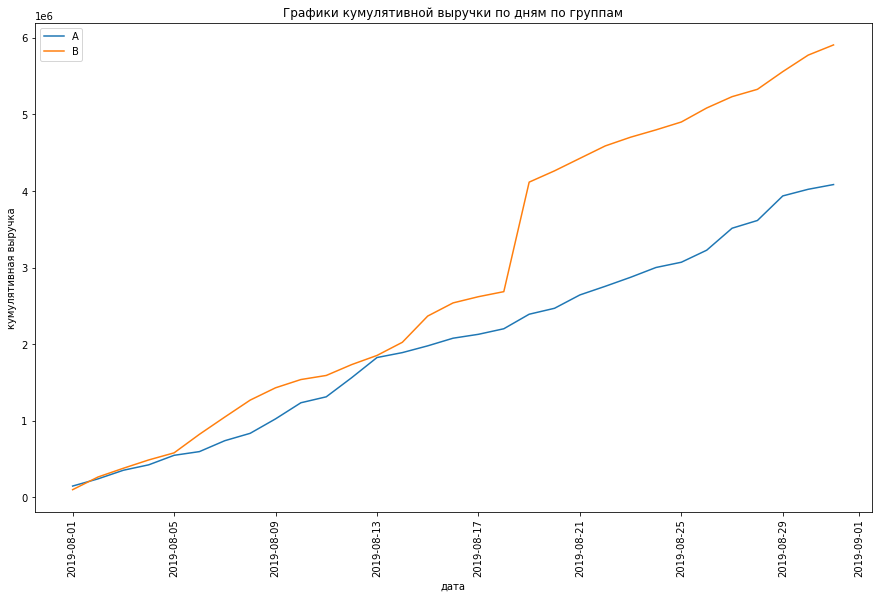

In [208]:
# Строим график выручки группы А
plt.figure(figsize=(15, 9))
plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['revenue'], label='A')
# Строим график выручки группы B
plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue'], label='B')
plt.title('Графики кумулятивной выручки по дням по группам')
plt.xticks(rotation=90)
plt.xlabel('дата')
plt.ylabel('кумулятивная выручка')
plt.legend();

Выручка почти равномерно увеличивается в течение всего теста. В первые пять дней графики практически совпадают, далее выручка группы В превышает кумулятивную выручку группы А, за исключением 13.08, когда графики совпадают. У графика кумулятивной выручки группы В наблюдается резкий скачок с 19 на 20 августа. Это может сигнализировать о всплеске числа заказов, либо о появлении очень дорогих заказов в выборке. 

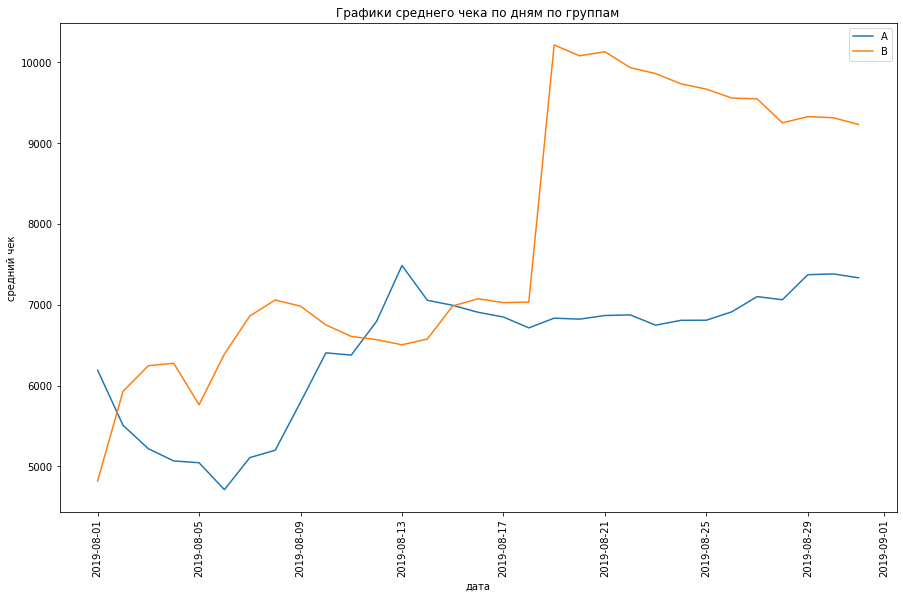

In [209]:
#Построим графики среднего чека по группам, разделив кумулятивную выручку на кумулятивное число заказов
plt.figure(figsize=(15, 9))
plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['revenue']/cumulative_revenue_a['orders'], label='A')
plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue']/cumulative_revenue_b['orders'], label='B')
plt.title('Графики среднего чека по дням по группам')
plt.xticks(rotation=90)
plt.xlabel('дата')
plt.ylabel('средний чек')
plt.legend() ;

Кумулятивное значение среднего чека по сегментам колеблется. Во второй половине месяца средний чек группы А сглаживается, но у  у графика группы В опять же наблюдается резкий скачок у графика группы В с 19 на 20 августа. Также стоит отметить, что с 20 августа у группы В средний чек постепенно снижается, а у группы А - растет. Необходимо провести дополнительный анализ выбросов, чтобы сделать выводы.

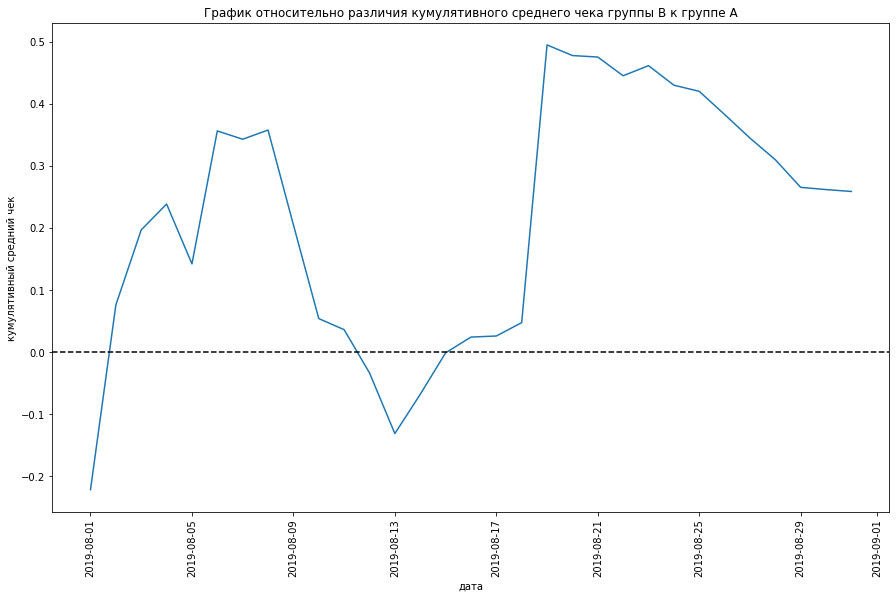

In [210]:
# собираем данные в одном датафрейме
merged_сumulative_revenue = cumulative_revenue_a.merge(cumulative_revenue_b, left_on='date', right_on='date', how='left', suffixes=['_a', '_b'])

# cтроим отношение средних чеков
plt.figure(figsize=(15, 9))
plt.plot(merged_сumulative_revenue['date'], (merged_сumulative_revenue['revenue_b']/merged_сumulative_revenue['orders_b'])/(merged_сumulative_revenue['revenue_a']/merged_сumulative_revenue['orders_a'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.title('График относительно различия кумулятивного среднего чека группы B к группе A')
plt.xticks(rotation=90)
plt.xlabel('дата')
plt.ylabel('кумулятивный средний чек');

В нескольких точках график различия между сегментами резко «скачет». Видимо, в эти дни были совершены аномально крупные заказы.

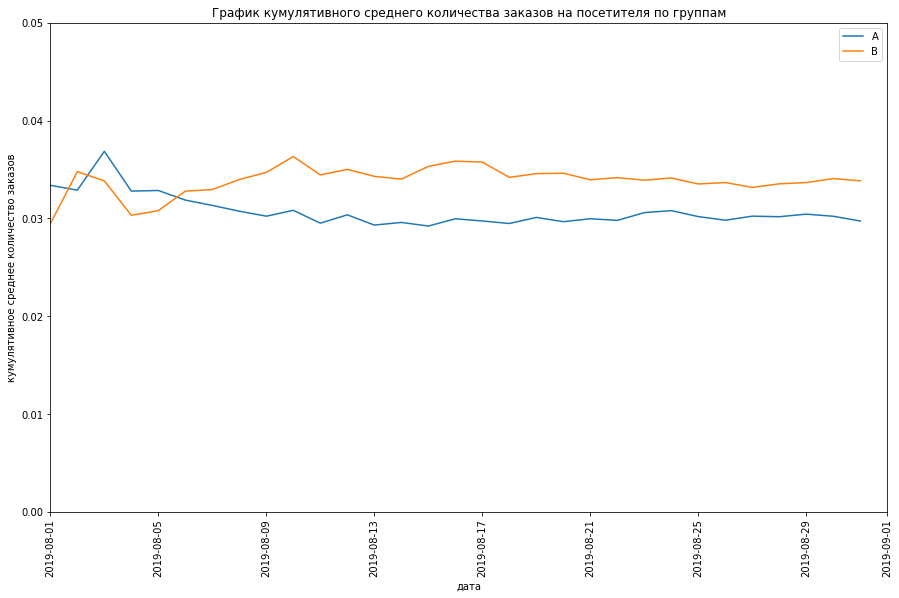

In [211]:
# считаем среднее количество заказов на посетителя
cumulative_data['conversion'] = cumulative_data['orders']/cumulative_data['visitors']

# отделяем данные по группе A
cumulative_data_a = cumulative_data[cumulative_data['group']=='A']

# отделяем данные по группе B
cumulative_data_b = cumulative_data[cumulative_data['group']=='B']


# строим графики
plt.figure(figsize=(15, 9))
plt.plot(cumulative_data_a['date'], cumulative_data_a['conversion'], label='A')
plt.plot(cumulative_data_b['date'], cumulative_data_b['conversion'], label='B')

plt.xticks(rotation=90)
plt.title('График кумулятивного среднего количества заказов на посетителя по группам')
plt.legend()
plt.xlabel('дата')
plt.ylabel('кумулятивное среднее количество заказов')
# задаем масштаб осей
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 9, 1), 0, 0.05]);

В начале теста сегмент А имел большее кумулятивное среднее число заказов, но с 6 августа сегемент В выровнялся и зафиксировался около одного значения, большего значения сегмента А. Абсолютное значения колебания в начале и в конце теста небольшое: от 3 до 4%.

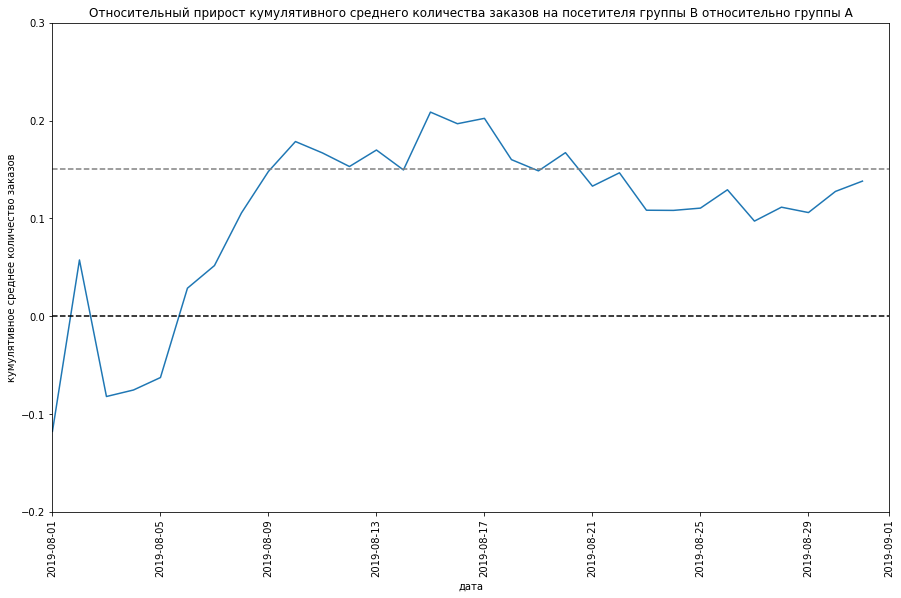

In [212]:
merged_cumulative_conversions = cumulative_data_a[['date','conversion']].merge(cumulative_data_b[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['_a', '_b'])

plt.figure(figsize=(15, 9))
plt.plot(merged_cumulative_conversions['date'], merged_cumulative_conversions['conversion_b']/merged_cumulative_conversions['conversion_a']-1)

plt.title('Относительный прирост кумулятивного среднего количества заказов на посетителя группы B относительно группы A')
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.15, color='grey', linestyle='--')
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 9, 1), -0.2, 0.3])
plt.xlabel('дата')
plt.ylabel('кумулятивное среднее количество заказов')
plt.xticks(rotation=90);

Почти с самого начала теста кумулятивное среднее количество заказов на посетителя группы В превышает кумулятивное среднее количество заказов на посетителя группы А. Однако, рост в середине месяца (около 20% относительно группы А) сменяется снижением к концу месяца и приближается к приросту около 15%. В целом, решение еще принимать рано. Возможно, анализ картины без выбросов прояснит ситуацию.

In [213]:
#число заказов с пользователя
orders_by_users = (
    orders.groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
)
orders_by_users.columns = ['user_id', 'orders']

In [214]:
orders_by_users['orders'].max()

11

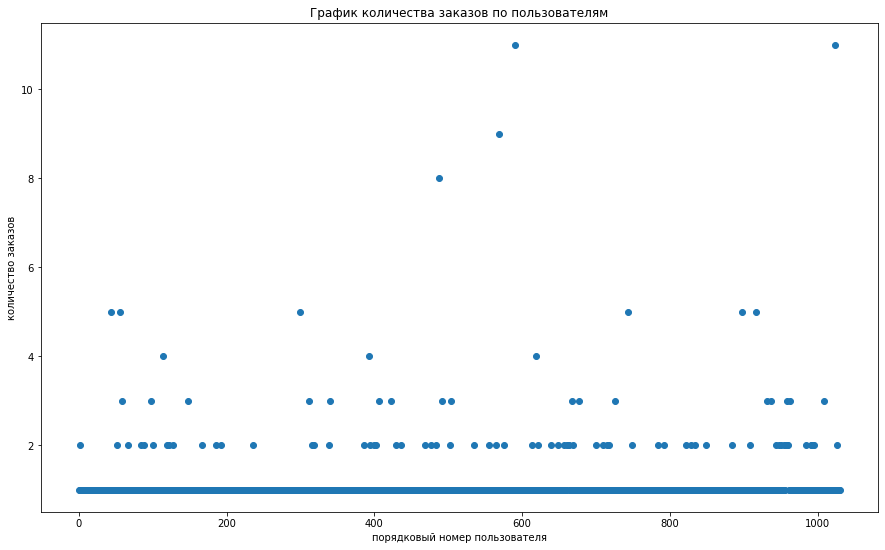

In [215]:
plt.figure(figsize=(15, 9))
x_values = pd.Series(range(0, len(orders_by_users)))
plt.scatter(x_values, orders_by_users['orders'])
plt.title('График количества заказов по пользователям')
plt.xlabel('порядковый номер пользователя')
plt.ylabel('количество заказов');

Количество пользователей, соверших более двух заказов, визуально заметно меньше, чем соверших 2 заказа. Поэтому эти пользователи вполне могут быть аномальными. Чтобы понять, является ли 2 заказа нормальным показателем, посчитаем 95 и 99 перцентили.

In [216]:
# 95-й и 99-й перцентили количества заказов на пользователя
print(np.percentile(orders_by_users['orders'], [95, 99])) 

[2. 4.]


Не более 5% пользователей совершили более 2 заказов и не более 1% пользователей совершил более 4 заказов. За верхнюю границу для определения аномальных пользователей выберем 2 заказа.

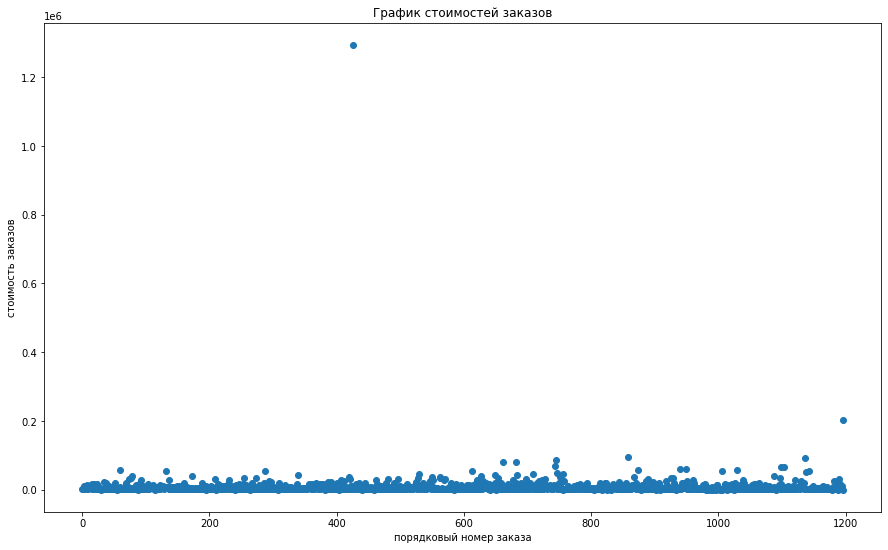

In [217]:
#точечный график стоимостей заказов
plt.figure(figsize=(15, 9))
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_values, orders['revenue']) 
plt.title('График стоимостей заказов')
plt.xlabel('порядковый номер заказа')
plt.ylabel('стоимость заказов');

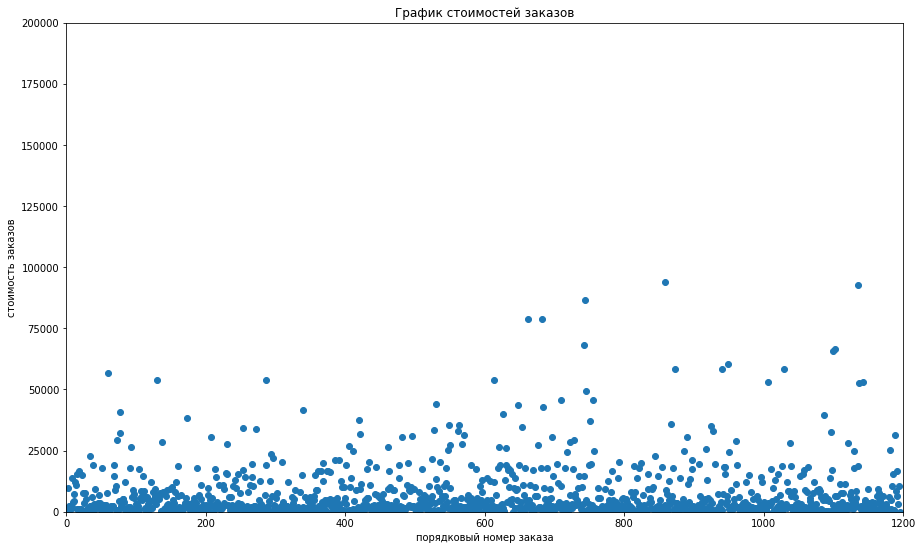

In [218]:
plt.figure(figsize=(15, 9))
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_values, orders['revenue']) 
plt.title('График стоимостей заказов')
plt.xlabel('порядковый номер заказа')
plt.ylabel('стоимость заказов')
plt.axis([0, 1200, 0, 200000]);

В большинстве случаев стоимость заказов варьирует в пределах от 0 до 200000. При этом на графике видны 2 особенно аномальных заказа (выбросов). При приближении распределении заказов со стоимостью от 0 до 200000, видим, что основная доля заказов распределена в пределах до 100000, а выше- уже аномальные заказы. Чтобы понять, какая стоимость является аномальной, посчитаем 95 и 99 перцентили.

In [219]:
#95-й и 99-й перцентили стоимости заказов
print(np.percentile(orders['revenue'], [95, 99])) 

[28000.  58233.2]


В числах пределы оказались еще ниже: не более 5% заказов имеют стоимость 28000 и не более 1% заказов стоимость 58233. За верхнюю границу для определения аномальных заказов выберем 28000.

*Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделайте выводы и предположения.*

**Нулевая гипотеза:** различий в среднем количестве заказов между группами нет. 

**Альтернативная:** различия в среднем количестве заказов между группами есть.

In [220]:
visitors_a_daily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitors_a_daily.columns = ['date', 'visitors_per_date_a']

In [221]:
visitors_b_daily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitors_b_daily.columns = ['date', 'visitors_per_date_b']

In [222]:
orders_by_users_a = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
orders_by_users_a.columns = ['visitor_id', 'orders']

orders_by_users_b = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
orders_by_users_b.columns = ['visitor_id', 'orders'] 

In [223]:
sample_a = pd.concat([orders_by_users_a['orders'],pd.Series(0, index=np.arange(visitors_a_daily['visitors_per_date_a'].sum() - len(orders_by_users_a['orders'])), name='orders')],axis=0)

sample_b = pd.concat([orders_by_users_b['orders'],pd.Series(0, index=np.arange(visitors_b_daily['visitors_per_date_b'].sum() - len(orders_by_users_b['orders'])), name='orders')],axis=0)

Проверим, каким распределением обладают выборки sample_a и sample_b, чтобы выбрать статистический критерий для проверки гипотез. Для проверки на нормальность воспользуемся критерием Колмогорова-Смирнова, поскольку количество наблюдей больше 5000 и критерием Шапиро-Уилка поэтому нельзя вопспользоваться.

In [224]:
alpha = 0.05 

results = stats.kstest(sample_a, 'norm')
p_value = results[1] 

print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: распределение не нормально')
else:
    print('Не получилось отвергнуть нулевую гипотезу, всё нормально') 

p-значение:  0.0
Отвергаем нулевую гипотезу: распределение не нормально


In [225]:
results = stats.kstest(sample_b, 'norm')
p_value = results[1] 

print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: распределение не нормально')
else:
    print('Не получилось отвергнуть нулевую гипотезу, всё нормально') 

p-значение:  0.0
Отвергаем нулевую гипотезу: распределение не нормально


Выборки sample_a и sample_b распределены не нормально, поэтому для проверки гипотезы воспользуемся непараметрическим критерием для 2 независимых выборок - Манна-Уитни на уровне значимости 0,05.

In [226]:
print('p-value теста:', "{0:.5f}".format(stats.mannwhitneyu(sample_a, sample_b)[1]))

print('Относительное различие среднего количества заказов между группами:', "{0:.3f}".format(sample_b.mean() / sample_a.mean() - 1))

p-value теста: 0.01679
Относительное различие среднего количества заказов между группами: 0.138


Так как p.value 0.01679 меньше заданного значения 0.05, отвергаем нулевую гипотезу, то есть согласно анализу по "сырым" данным, **между группами различия в среднем количестве заказов есть.**  Относительный прирост среднего группы B к конверсии группы А равен 13.8%.

*Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.*

**Нулевая гипотеза:** различий в среднем чеке между группами нет. 
    
**Альтернативная гипотеза:** различия в среднем чеке между группами есть. 

In [227]:
#сформируем выборки
sample_a = orders[orders['group']=='A']['revenue']
sample_b = orders[orders['group']=='B']['revenue']

In [228]:
#проверим выборки на нормальность, чтобы сделать выбор статистического критерия проверки статистических гипотез
results = stats.kstest(sample_a, 'norm')
p_value = results[1] 

print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: распределение не нормально')
else:
    print('Не получилось отвергнуть нулевую гипотезу, всё нормально') 

p-значение:  0.0
Отвергаем нулевую гипотезу: распределение не нормально


In [229]:
#проверим выборки на нормальность, чтобы сделать выбор статистического критерия проверки статистических гипотез
results = stats.kstest(sample_b, 'norm')
p_value = results[1] 

print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: распределение не нормально')
else:
    print('Не получилось отвергнуть нулевую гипотезу, всё нормально') 

p-значение:  0.0
Отвергаем нулевую гипотезу: распределение не нормально


Выборки sample_a и sample_b распределены не нормально, поэтому для проверки гипотезы воспользуемся непараметрическим критерием для 2 независимых выборок - Манна-Уитни на уровне значимости 0.05.

In [230]:
print('p-value теста:', '{0:.3f}'.format(stats.mannwhitneyu(sample_a, sample_b)[1]))
print('Относительное различие среднего чека между группами:','{0:.3f}'.format(sample_b.mean()/sample_a.mean()-1))

p-value теста: 0.729
Относительное различие среднего чека между группами: 0.259


Так как p.value 0.729 значительно больше значения 0.05, нет оснований отвергнуть нулевую гипотезу, то есть согласно анализу по "сырым" данным, **между группами различий в среднем чека нет.**  Однако, относительное различие среднего чека между сегментами довольно ощутимое - около 26%.

*Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделайте выводы и предположения.*

**Нулевая гипотеза:** различий в среднем количестве заказов между группами нет. 

**Альтернативная:** различия в среднем количестве заказов между группами есть.

In [231]:
#очистим данные от аномалий
users_with_many_orders = pd.concat(
    [
        orders_by_users_a.loc[orders_by_users_a['orders'] > 2,'visitor_id'],
        orders_by_users_b.loc[orders_by_users_b['orders'] > 2,'visitor_id'],
    ],
    axis=0,
)
users_with_expensive_orders = orders[orders['revenue'] > 28000]['visitor_id']
abnormal_users = (
    pd.concat([users_with_many_orders, users_with_expensive_orders], axis=0)
    .drop_duplicates()
    .sort_values()
)

In [232]:
#сформируем выборки
sample_a_filtered = pd.concat(
    [
        orders_by_users_a[
            np.logical_not(orders_by_users_a['visitor_id'].isin(abnormal_users))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors_a_daily['visitors_per_date_a'].sum() - len(orders_by_users_a['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sample_b_filtered = pd.concat(
    [
        orders_by_users_b[
            np.logical_not(orders_by_users_b['visitor_id'].isin(abnormal_users))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors_b_daily['visitors_per_date_b'].sum() - len(orders_by_users_b['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)


In [233]:
#проверим выборки на нормальность, чтобы сделать выбор статистического критерия проверки статистических гипотез
results = stats.kstest(sample_a_filtered, 'norm')
p_value = results[1] 

print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: распределение не нормально')
else:
    print('Не получилось отвергнуть нулевую гипотезу, всё нормально') 

p-значение:  0.0
Отвергаем нулевую гипотезу: распределение не нормально


In [234]:
#проверим выборки на нормальность, чтобы сделать выбор статистического критерия проверки статистических гипотез
results = stats.kstest(sample_b_filtered, 'norm')
p_value = results[1] 

print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: распределение не нормально')
else:
    print('Не получилось отвергнуть нулевую гипотезу, всё нормально') 

p-значение:  0.0
Отвергаем нулевую гипотезу: распределение не нормально


Выборки sample_a_filtered и sample_b_filtered распределены не нормально, поэтому для проверки гипотезы воспользуемся непараметрическим критерием для 2 независимых выборок - Манна-Уитни на уровне значимости 0.05.

In [235]:
print('p-value теста:','{0:.5f}'.format(stats.mannwhitneyu(sample_a_filtered, sample_b_filtered)[1]))
print('Относительное различие среднего количества заказов между группами:','{0:.3f}'.format(sample_b_filtered.mean()/sample_a_filtered.mean()-1))

p-value теста: 0.01304
Относительное различие среднего количества заказов между группами: 0.173


Так как p.value 0.01304 меньше заданного значения 0.05, отвергаем нулевую гипотезу, то есть согласно анализу по очищенным данным, **между группами различия в среднем количестве заказов есть.**  Относительный прирост среднего группы B к конверсии группы А равен 17.3%.

*Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.*

**Нулевая гипотеза:** различий в среднем чеке между группами нет. 
    
**Альтернативная гипотеза:** различия в среднем чеке между группами есть. 

In [236]:
#сформируем выборки
sample_a_filtered = orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitor_id'].isin(abnormal_users)),
                )
            ]['revenue']

sample_b_filtered = orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(abnormal_users)),
                )
            ]['revenue']

In [237]:
#проверим выборки на нормальность, чтобы сделать выбор статистического критерия проверки статистических гипотез
results = stats.kstest(sample_a_filtered, 'norm')
p_value = results[1] 

print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: распределение не нормально')
else:
    print('Не получилось отвергнуть нулевую гипотезу, всё нормально') 

p-значение:  0.0
Отвергаем нулевую гипотезу: распределение не нормально


In [238]:
#проверим выборки на нормальность, чтобы сделать выбор статистического критерия проверки статистических гипотез
results = stats.kstest(sample_b_filtered, 'norm')
p_value = results[1] 

print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: распределение не нормально')
else:
    print('Не получилось отвергнуть нулевую гипотезу, всё нормально') 

p-значение:  0.0
Отвергаем нулевую гипотезу: распределение не нормально


Выборки sample_a_filtered и sample_b_filtered распределены не нормально, поэтому для проверки гипотезы воспользуемся непараметрическим критерием для 2 независимых выборок - Манна-Уитни на уровне значимости 0.05.

In [239]:
print('p-value теста:','{0:.5f}'.format(stats.mannwhitneyu(sample_a_filtered, sample_b_filtered)[1]))
print('Относительное различие среднего количества заказов между группами:','{0:.3f}'.format(sample_b_filtered.mean()/sample_a_filtered.mean()-1))

p-value теста: 0.73848
Относительное различие среднего количества заказов между группами: -0.020


Как и в случае с "сырыми" данными, мы не можем отвергнуть нулевую гипотезу (так какp.value 0.73848 значительно больше значения 0.05,), то есть **между группами различий в среднем чека нет.**  Однако, относительное различие среднего чека между сегментами практически отсутствует - около 2%, причем проигрывает группа B.

Cогласно анализу по "сырым" данным, между группами различия в среднем количестве заказов есть. Относительный прирост среднего группы B к конверсии группы А равен 13.8% Cогласно анализу по "сырым" данным, между группами различий в среднем чека нет. Однако, относительное различие среднего чека между сегментами довольно ощутимое - около 26%.

по очищенным данным, между группами различия в среднем количестве заказов есть. Относительный прирост среднего группы B к конверсии группы А равен 17.3%. между группами различий в среднем чека нет. Однако, относительное различие среднего чека между сегментами практически отсутствует - около 2%, причем проигрывает группа B.

*Примите решение по результатам теста и объясните его. Варианты решений:*
1. Остановить тест, зафиксировать победу одной из групп.
2. Остановить тест, зафиксировать отсутствие различий между группами.
3. Продолжить тест.

Есть статистически значимое различие по конверсии между группами как по сырым данным, так и после фильтрации аномалий.
Статистически значимого различия по среднему чеку между группами нет как по сырым данным, так и после фильтрации аномалий.

График различия конверсии между группами сообщает, что результаты группы B лучше группы A: имеют тенденцию к росту, либо зафиксировались около среднего значения. Поэтому тест следует остановить, признать успешным и зафиксировать лучшие результаты у группы В.